In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

630


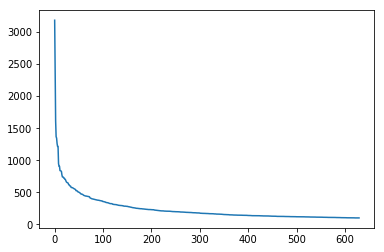

In [35]:
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

otc_count_x = 3
rx_count_y = 2
days_z = 30

# Read SKU and OTCs
f = open('rx_otc.csv', 'r')
skus = {}
for line in f:
    line = line.strip().replace('"', '').split(',')
    skus[line[0]] = line[1]

f = open('orders.csv', 'r')

user_orders = defaultdict(lambda: {})
order_user = {}

for line in f:
    line = line.replace('"', '').strip().split(',')
    if len(line) != 3:
        continue
    user_orders[line[0]][line[1]] = {'date': line[2], 'items': []}
    order_user[line[1]] = line[0]

f = open('data.csv', 'r')

for line in f:
    line = line.replace('"', '').strip().split(',')
    user_id = order_user.get(line[0])
    if user_id:
        user_orders[user_id][line[0]]['items'].append(line[1])


buckets = [0] + [2*(x+1) for x in range(10)] + [999999]
dx = [0 for _ in range(len(buckets))]
dx2 = [0 for _ in range(len(buckets))]

sku_freqs = defaultdict(lambda: 0)

for k, v in user_orders.items():
    tot_count = 0 #RX
    tot_count2 = 0 #OTC
    ordered_sets = defaultdict(lambda: 0)
    for k2, v2 in v.items():
        try:
            order_date = datetime.strptime(v2['date'], '%Y-%m-%d %H:%M:%S.%f').date()
        except:
            order_date = datetime.strptime(v2['date'], '%Y-%m-%d %H:%M:%S').date()
        #if (order_date.year == 2017) or (order_date.year == 2016):
        for i in v2['items']:
            ordered_sets[i] += 1
            print 

    for i, v in ordered_sets.items():
        if skus.get(i) == "TRUE":
            tot_count +=1
        else:
            if v>1:
                sku_freqs[i] += 1

    # if tot_count:
    #     for b in buckets:
    #         if tot_count <= b:
    #             dx[buckets.index(b)] += 1

    # if tot_count2:
    #     for b in buckets:
    #         if tot_count2 <= b:
    #             dx2[buckets.index(b)] += 1

for_sort = []
for k, v in sku_freqs.items():
    if v>100:
        for_sort.append((k, v))

for_sort.sort(key=lambda x: x[1], reverse=True)

#for i in for_sort:
    #print(i)

print(len(for_sort))

plt.plot([x[1] for x in for_sort])
plt.show()

In [36]:
top_skus = [x[0] for x in for_sort][:20]

In [48]:
data = pd.read_csv('data.csv',header=None)

In [51]:
data.columns = ['orderid','itemid','quantity']

In [53]:
df[df.itemid==140934]

,orderid,itemid,quantity,userid,date
80914,PO36216107298018,140934,2,mvkarvasant@yahoo.com,2016-12-28
80915,PO31716177539063,140934,3,sgn_sulochi@yahoo.com,2016-11-13
80916,PO155175281362,140934,1,7c741250-9c14-43bf-9b56-92ddff65138c,2017-06-05
80917,PO15517553343689,140934,1,f6d06789-32e7-439e-b758-6285b5959a87,2017-06-05
80918,PO3171618000104,140934,3,gupta03@gmail.com,2016-11-13
80919,PO341646752-681,140934,10,vamsi7164@gmail.com,2016-02-04
80920,PO491664609-172,140934,20,manish_goyal1984@yahoo.co.in,2016-02-19
80921,PO15517547583111,140934,1,mcgoel46@gmail.com,2017-06-05
80922,PO15517541354643,140934,1,983f278a-cfd8-4f44-b9ac-2da0aa5d54f7,2017-06-05
80923,PO15617293827955,140934,3,deepakcwa3@gmail.com,2017-06-06


In [37]:
df_is_otc = pd.read_csv('rx_otc.csv',header=None)
df_is_otc.columns = ['item_id','is_otc']
data = pd.read_csv('data.csv',header=None)
data.columns = ['orderid','itemid','quantity']
orders = pd.read_csv('orders.csv',header=None)
orders.columns = ['userid','orderid','date']
data=data.loc[data['itemid'].isin(top_skus)].reset_index(drop=True)
df=pd.merge(data,orders,how='inner',on='orderid').sort_values(by='itemid',ascending=[True]).reset_index(drop=True)
df.date = df.date.apply(lambda x:x.split(' ')[0])
df['date'] =pd.to_datetime(df.date)

In [38]:
df=df[df.quantity!=0].reset_index(drop=True)

In [26]:
df[df.itemid==51344]

,orderid,itemid,quantity,userid,date


123429


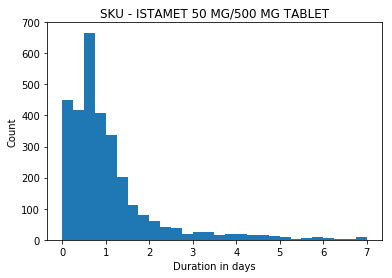

126310


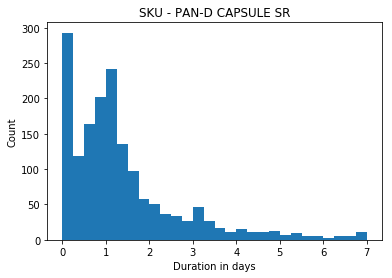

140934


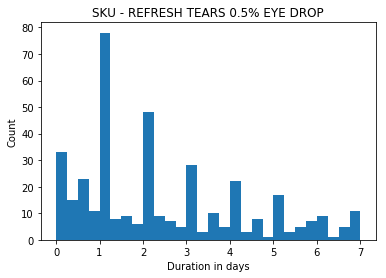

173029


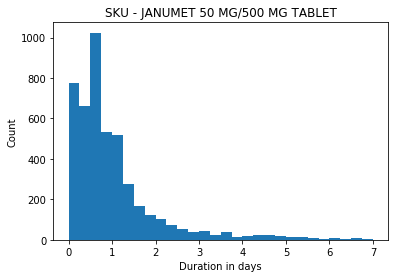

126729


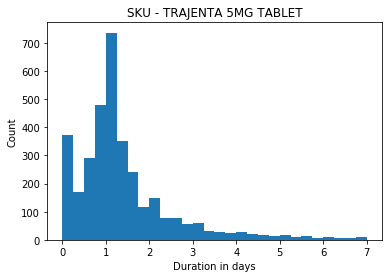

161866


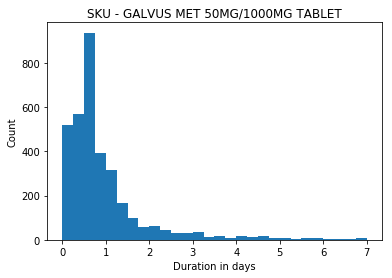

203430


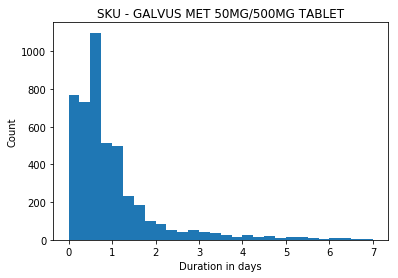

40780


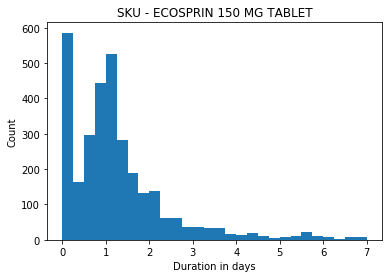

117725


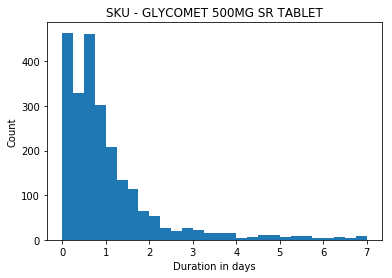

156977


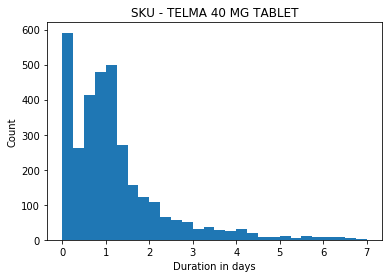

304755


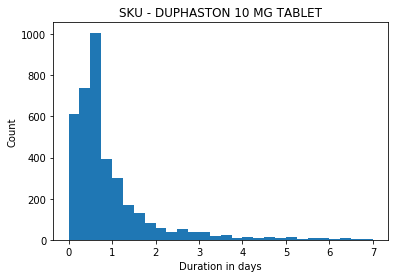

123637


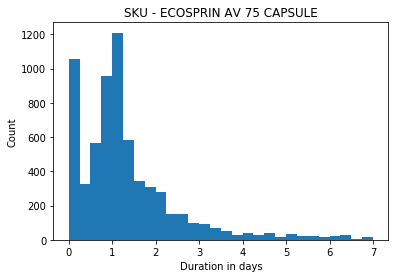

150422


KeyboardInterrupt: 

In [67]:
d=dict()
for i in list(set(df.itemid)):
    print (i)
    #import matplotlib.pyplot as plt
    plt.clf()
    df1 = df[df.itemid==i].sort_values(by='date').reset_index(drop=True)
    dist = []
    for user in list(set(df1.userid)):
        #print (user)
        df_user = df1[df1.userid==user].drop_duplicates('date','first').reset_index(drop=True)
        for j in range(len(df_user)-1):
            
            
            #print (df_user.orderid[j],df_user.quantity[j],df_user.date[j])
            dist.append(((pd.Timedelta(df_user.date[j+1]-df_user.date[j]).total_seconds())/int(df_user.quantity[j]))/(3600*24))
            #dist.append(((pd.Timedelta(df_user.date[j+1]-df_user.date[j]).total_seconds())/(3600*24)))
            #print (df_user.quantity[j])
            #print ((df_user.date[j+1]-df_user.date[j])/int(df_user.quantity[j]))
    d[i]=dist    
    plt.hist(dist, bins=a)
    #fig = plt.figure()
    
    #fig.suptitle('Item ID - %s'%i, fontsize=20)
    plt.xlabel('Duration in days')
    plt.ylabel('Count')
    plt.title('SKU -'+' '+skus['%s'%i])
    plt.show()
    #plt.savefig('top20_sku_dist/sku_%s.png'%i)

In [43]:
a = []

for i in range(29):
    a.append(i*(0.25))

In [44]:
a

[0.0,
 0.25,
 0.5,
 0.75,
 1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0,
 3.25,
 3.5,
 3.75,
 4.0,
 4.25,
 4.5,
 4.75,
 5.0,
 5.25,
 5.5,
 5.75,
 6.0,
 6.25,
 6.5,
 6.75,
 7.0]

In [1]:
import pickle
skus = pickle.load(open('skunames.p','rb'))

In [2]:
skus['328150']

'PATANJALI DANT KANTI MEDICATED (PACK OF 2)'

In [62]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'